## Gradient Descent: The Code

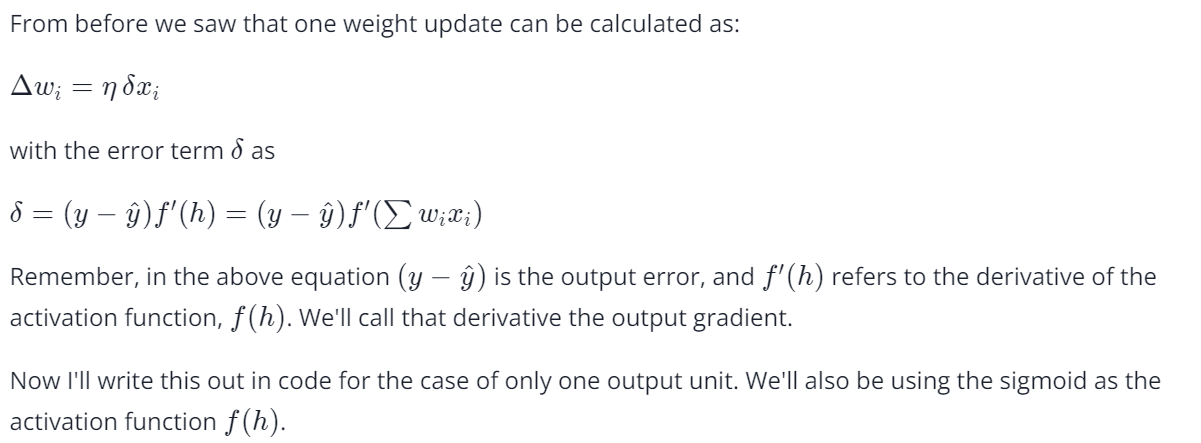

In [49]:
import numpy as np
import pandas as pd 


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [50]:
# Input data
x = np.array([0.1, 0.3])

# Target
y = 0.2

# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

In [51]:
# the linear combination performed by the node (h in f(h) and f'(h)) or h = np.dot(x, weights)
h = x[0]*weights[0] + x[1]*weights[1]

print("Value of h is :",h)

Value of h is : 0.06999999999999998


In [52]:
# The neural network output (y-hat)
nn_output = sigmoid(h)

print("Value of nn_output is :",nn_output)

# output error (y - y-hat)
error = y - nn_output
print("Value of error is :",error)

# output gradient (f'(h))
output_grad = sigmoid_prime(h)
print("Value of output_grad is :",output_grad)

Value of nn_output is : 0.5174928576663897
Value of error is : -0.31749285766638974
Value of output_grad is : 0.24969399993066344


In [53]:
# error term (lowercase delta)
error_term = error * output_grad
print("Value of error_term is :",error_term)

# Gradient descent step  or del_w = learnrate * error_term * x
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1]]

print("Value of h del_w :",del_w)

Value of error_term is : -0.07927606158013766
Value of h del_w : [-0.003963803079006883, -0.011891409237020648]


In [54]:
learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

# Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# Calculate output of neural network
nn_output = sigmoid(h)

# Calculate error of neural network
error = y - nn_output

# Calculate the error term

error_term = error * sigmoid_prime(h)

# Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


## Mean Square Error

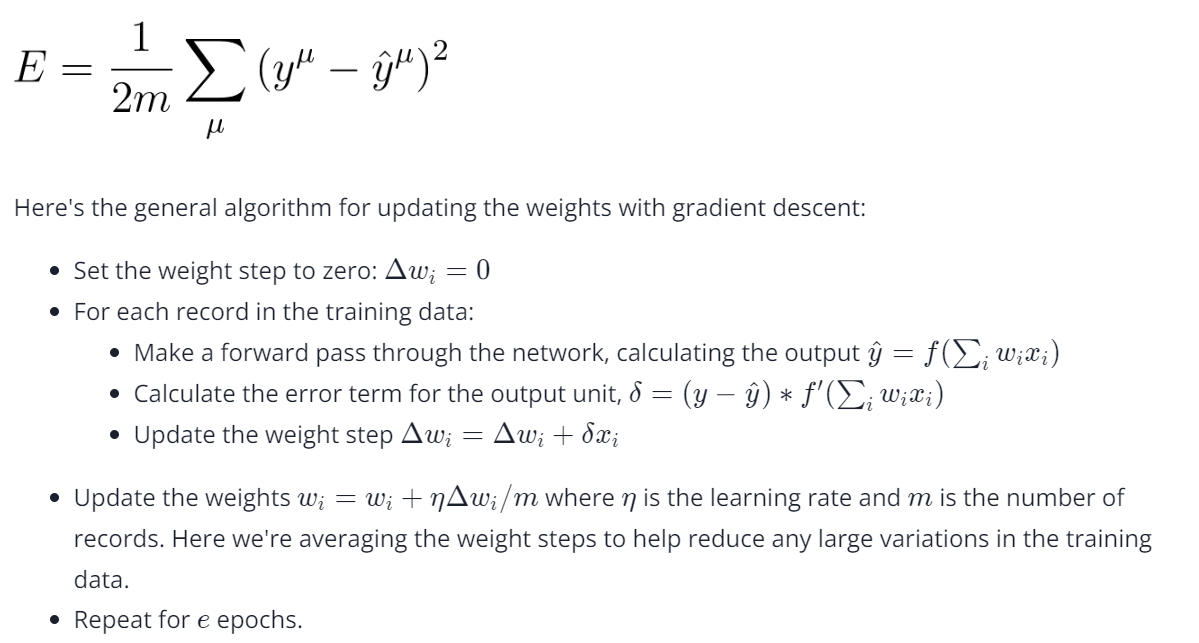

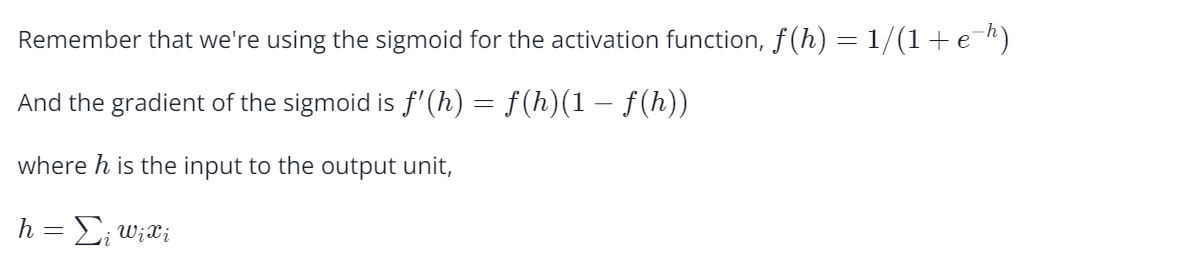


### Excercise

In [55]:
admissions = pd.read_csv('student_data.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

In [56]:
# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std

In [57]:
# Split off random 10% of the data for testing
np.random.seed(42)

sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.loc[sample], data.drop(sample)


# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [58]:
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

In [59]:
for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target Activation of the output unit
        
        output = sigmoid(np.dot(x, weights))

        # The error, the target minus the network output
        error = y - output

        # The error term
        #   Notice we calulate f'(h) here instead of defining a separate
        #   sigmoid_prime function. This just makes it faster because we
        #   can re-use the result of the sigmoid function stored in
        #   the output variable
        error_term = error * output * (1 - output)

        # The gradient descent step, the error times the gradient times the inputs
        del_w += error_term * x
        
        # Update the weights here. The learning rate times the  change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

            # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

Train loss:  0.20265263357747265
Train loss:  0.235251917684705   WARNING - Loss Increasing
Train loss:  0.23525191767918452
Train loss:  0.23525191767918463   WARNING - Loss Increasing
Train loss:  0.23525191767918463
Train loss:  0.23525191767918463
Train loss:  0.23525191767918463
Train loss:  0.23525191767918463
Train loss:  0.23525191767918463
Train loss:  0.23525191767918463


In [60]:
# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.725


## Multilayer Perceptron

Each row in the matrix will correspond to the weights leading out of a single input unit, and each column will correspond to the weights leading in to a single hidden unit. For our three input units and two hidden units, the weights matrix looks like this:

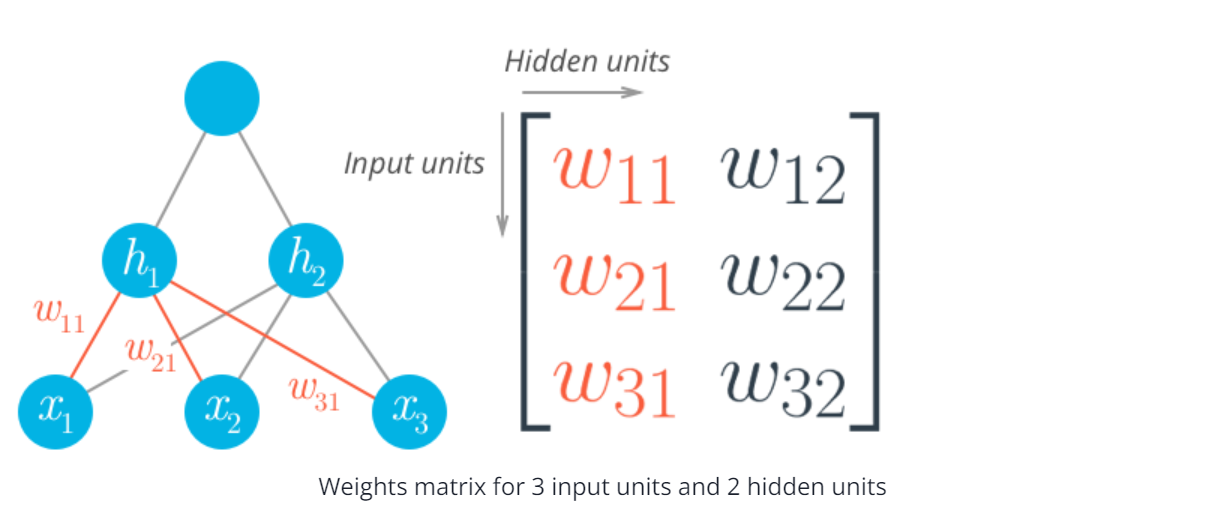
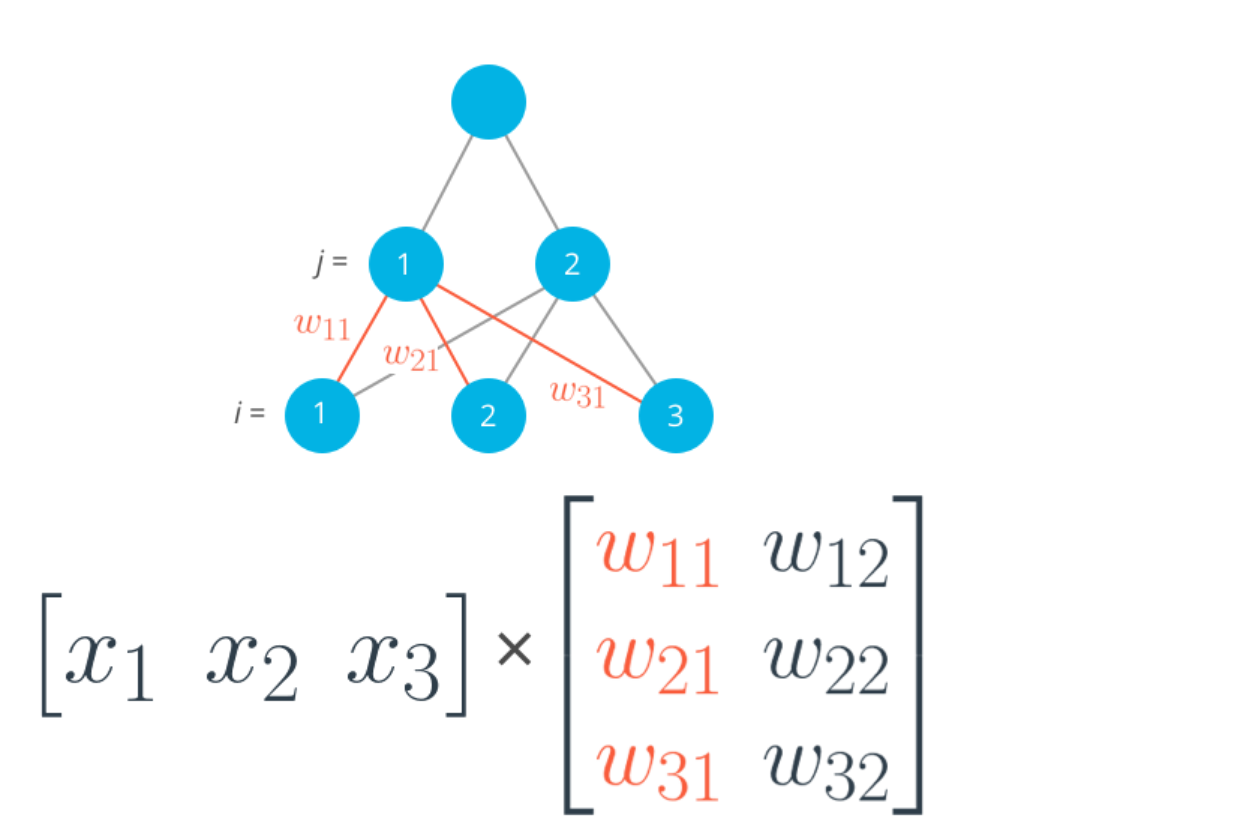

In [61]:
# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# Make a forward pass through the network

hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]


In [62]:
output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Output-layer Output:
[0.49815196 0.48539772]


## Backpropagation

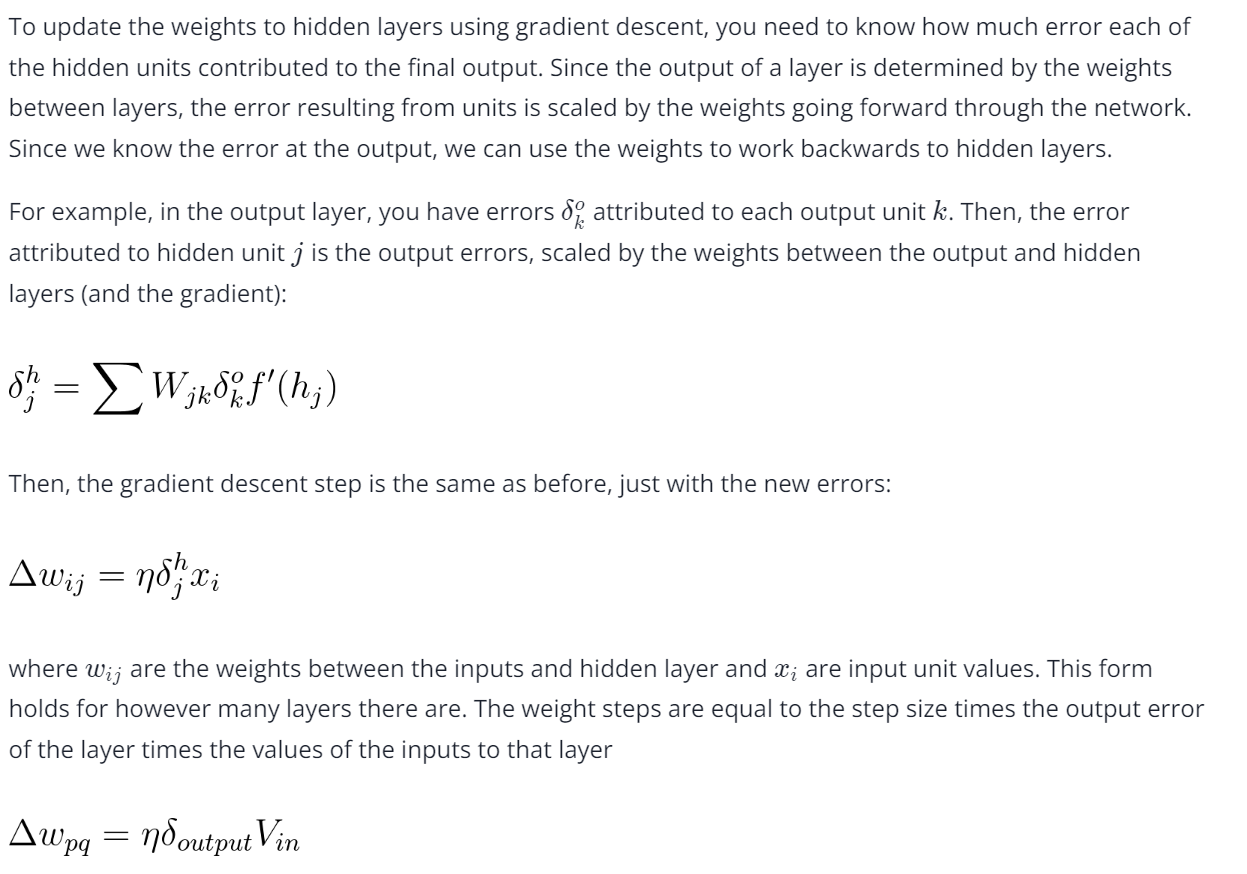

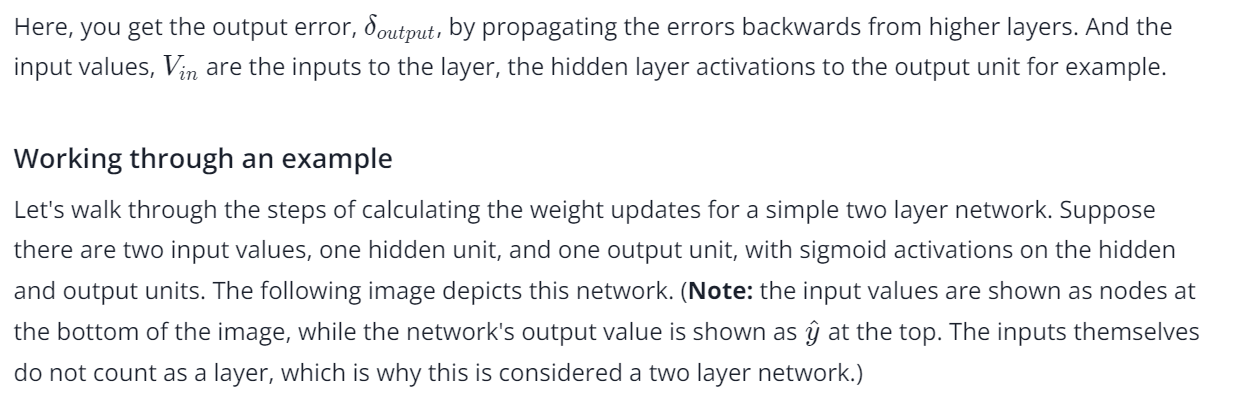

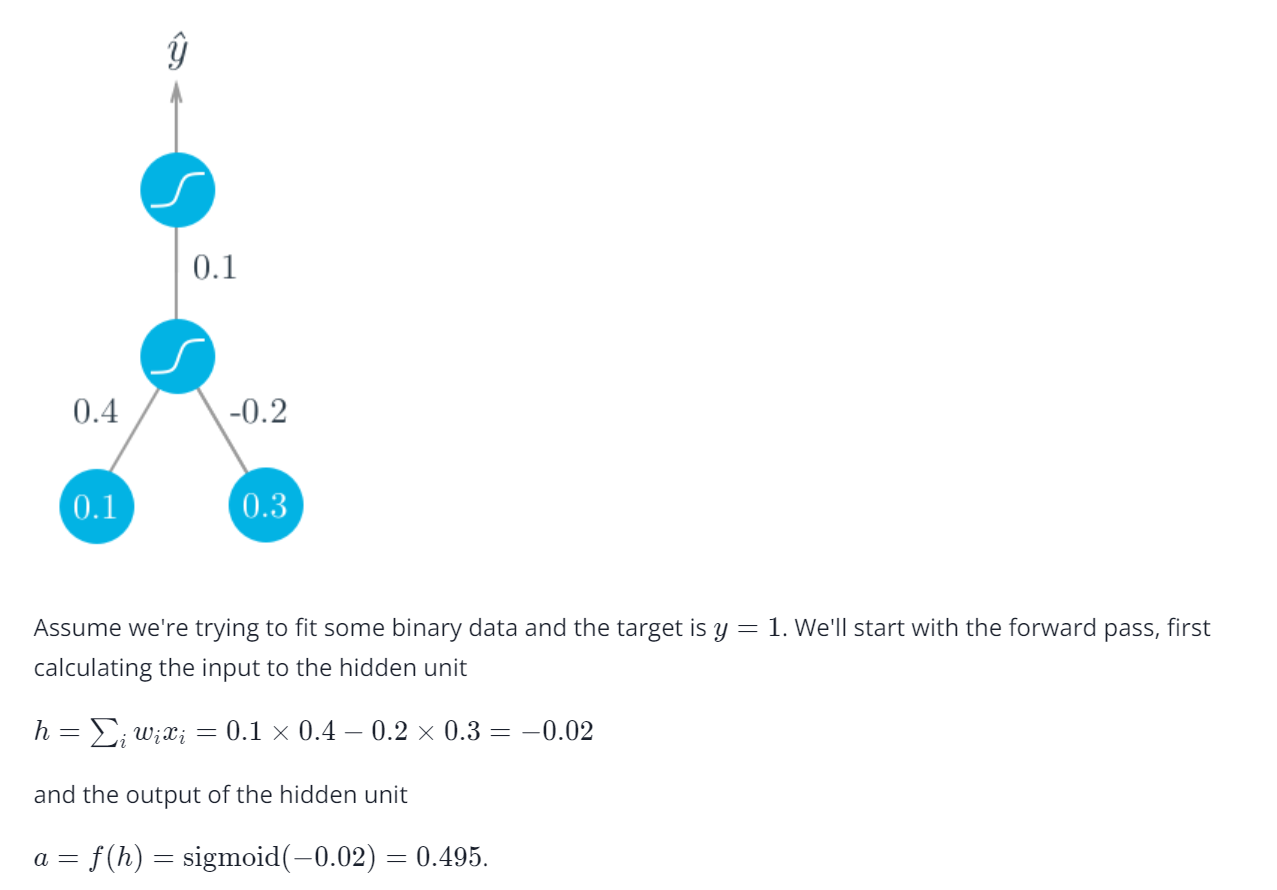

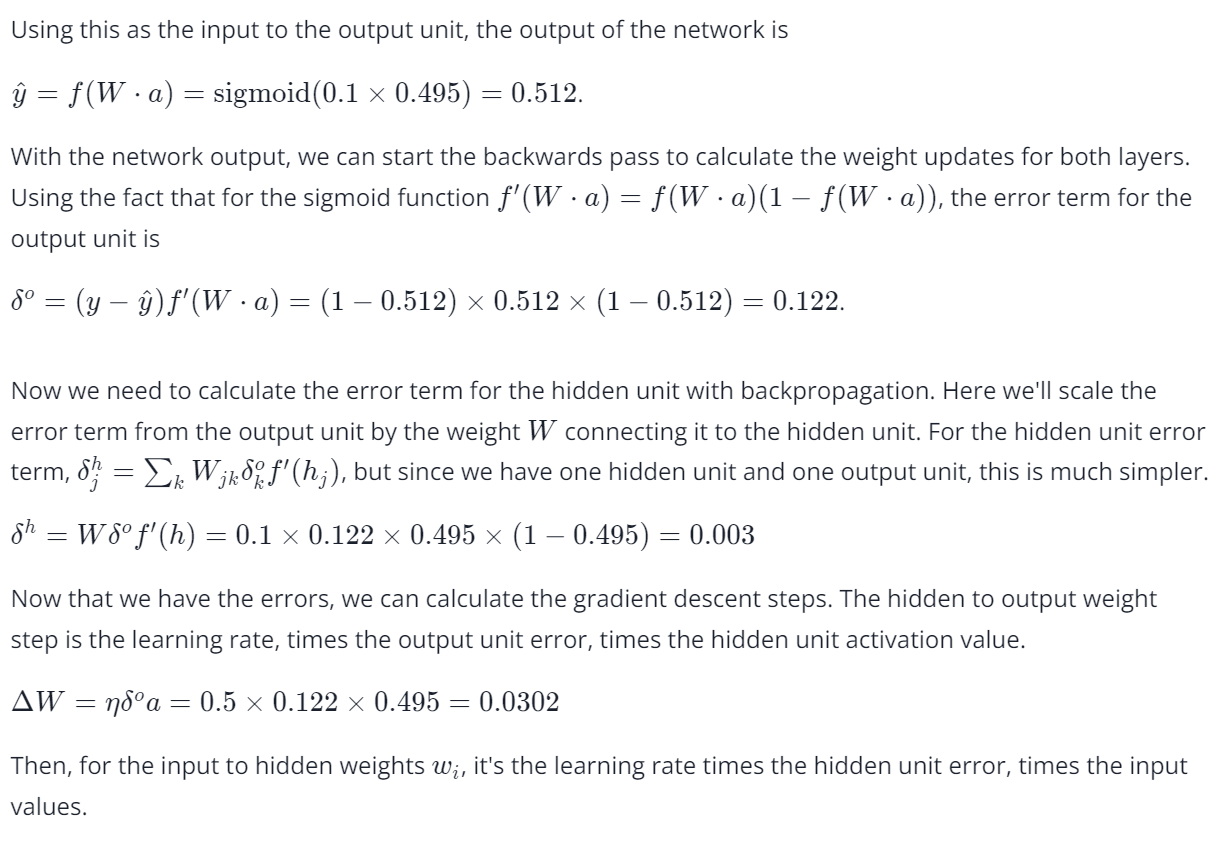

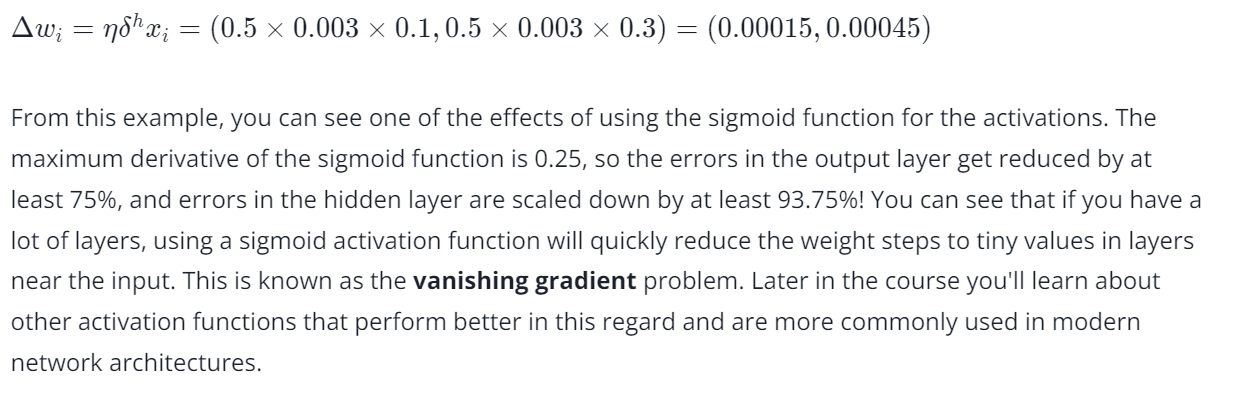


In [63]:
x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass : Calculate output error
error = target - output

# Calculate error term for output layer
output_error_term = error * output * (1 - output)

# Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


## Implementing backpropagation
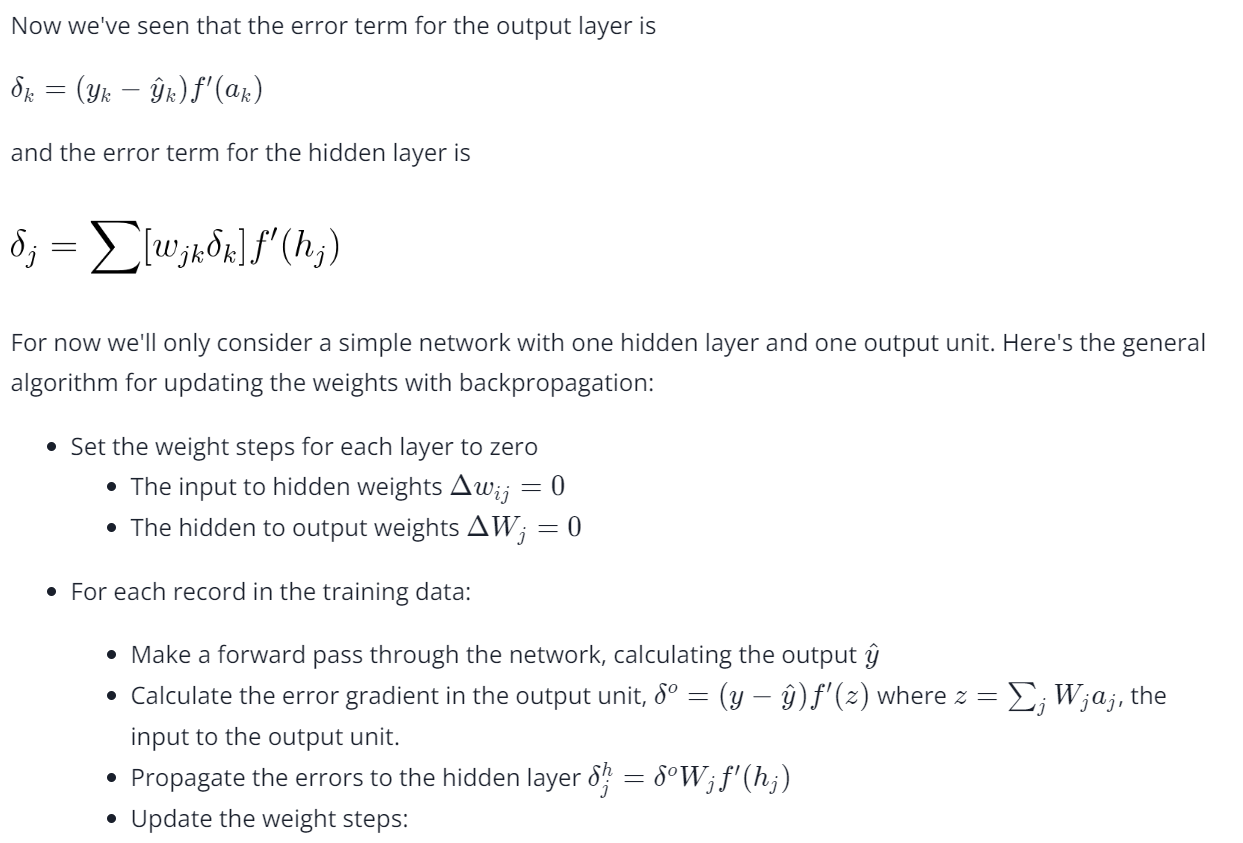

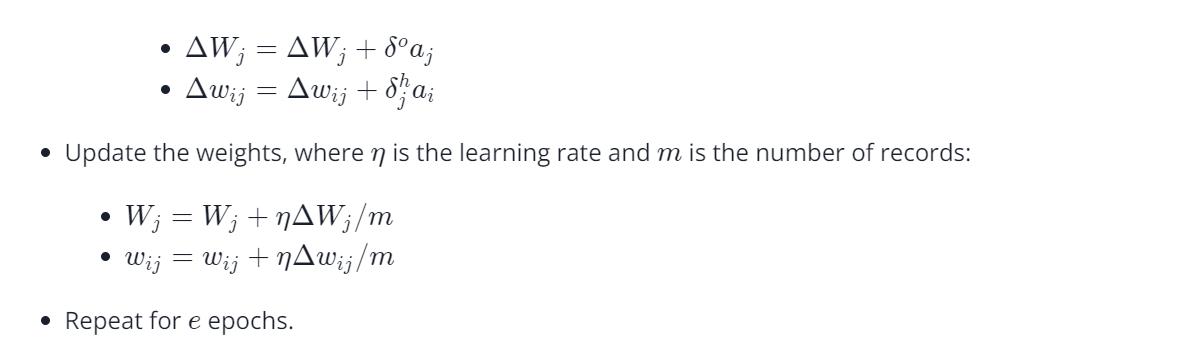

In [64]:
admissions = pd.read_csv('student_data.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.loc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [40]:
np.random.seed(21)

# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None


# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass
        # Calculate the output
        
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass 
        # Calculate the network's prediction error
        error = y - output

        # Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


Train loss:  0.25135725242598617
Train loss:  0.24996540718842886
Train loss:  0.24862005218904654
Train loss:  0.24731993217179746
Train loss:  0.24606380465584848
Train loss:  0.24485044179257162
Train loss:  0.2436786320186832
Train loss:  0.24254718151769536
Train loss:  0.24145491550165465
Train loss:  0.24040067932493367
Prediction accuracy: 0.725
